<a href="https://colab.research.google.com/github/AaliyahLusianti074/Machine-learning/blob/main/Tugas_3_Klasifikasi_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
import zipfile

local_zip = '/content/gdrive/My Drive/ML/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from os import mkdir

mkdir('/content/asl_alphabet')
mkdir('/content/asl_alphabet/train')
mkdir('/content/asl_alphabet/train/A')
mkdir('/content/asl_alphabet/train/B')
mkdir('/content/asl_alphabet/validation')
mkdir('/content/asl_alphabet/validation/A')
mkdir('/content/asl_alphabet/validation/B')

In [ ]:
import os
import shutil

a_original = "/content/asl_alphabet_train/asl_alphabet_train/A"
a_train = "/content/asl_alphabet/train/A"
a_validation = "/content/asl_alphabet/validation/A"

files = os.listdir(a_original)

# Pindah 70% file
for file in files[0:int(len(files) * .7)]:
  new_path = shutil.move(f"{a_original}/{file}", a_train)

In [ ]:
files2 = os.listdir(a_original)

# Pindah sisa file
for file in files2:
    new_path = shutil.move(f"{a_original}/{file}", a_validation)

In [ ]:
import os
import shutil

b_original = "/content/asl_alphabet_train/asl_alphabet_train/B"
b_train = "/content/asl_alphabet/train/B"
b_validation = "/content/asl_alphabet/validation/B"

files = os.listdir(b_original)

# Pindah 70% file
for file in files[0:int(len(files) * .7)]:
  new_path = shutil.move(f"{b_original}/{file}", b_train)

In [ ]:
files2 = os.listdir(b_original)

# Pindah sisa file
for file in files2:
    new_path = shutil.move(f"{b_original}/{file}", b_validation)

In [ ]:
base_dir = '/content/asl_alphabet'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_a_dir = os.path.join(train_dir, 'A')
train_b_dir = os.path.join(train_dir, 'B')

validation_a_dir = os.path.join(validation_dir, 'A')
validation_b_dir = os.path.join(validation_dir, 'B')

In [ ]:
print(os.listdir(train_a_dir)[:10])
print(os.listdir(train_b_dir)[:10])

['A2788.jpg', 'A99.jpg', 'A951.jpg', 'A2076.jpg', 'A1255.jpg', 'A1953.jpg', 'A281.jpg', 'A2682.jpg', 'A2864.jpg', 'A2449.jpg']
['B777.jpg', 'B1053.jpg', 'B228.jpg', 'B1266.jpg', 'B1524.jpg', 'B1589.jpg', 'B269.jpg', 'B527.jpg', 'B1862.jpg', 'B106.jpg']


In [ ]:
print('total training A images:', len(os.listdir(train_a_dir)))
print('total training B images:', len(os.listdir(train_b_dir)))
print('total validation A images:', len(os.listdir(validation_a_dir)))
print('total validation B images:', len(os.listdir(validation_b_dir)))

total training A images: 2100
total training B images: 2100
total validation A images: 900
total validation B images: 900


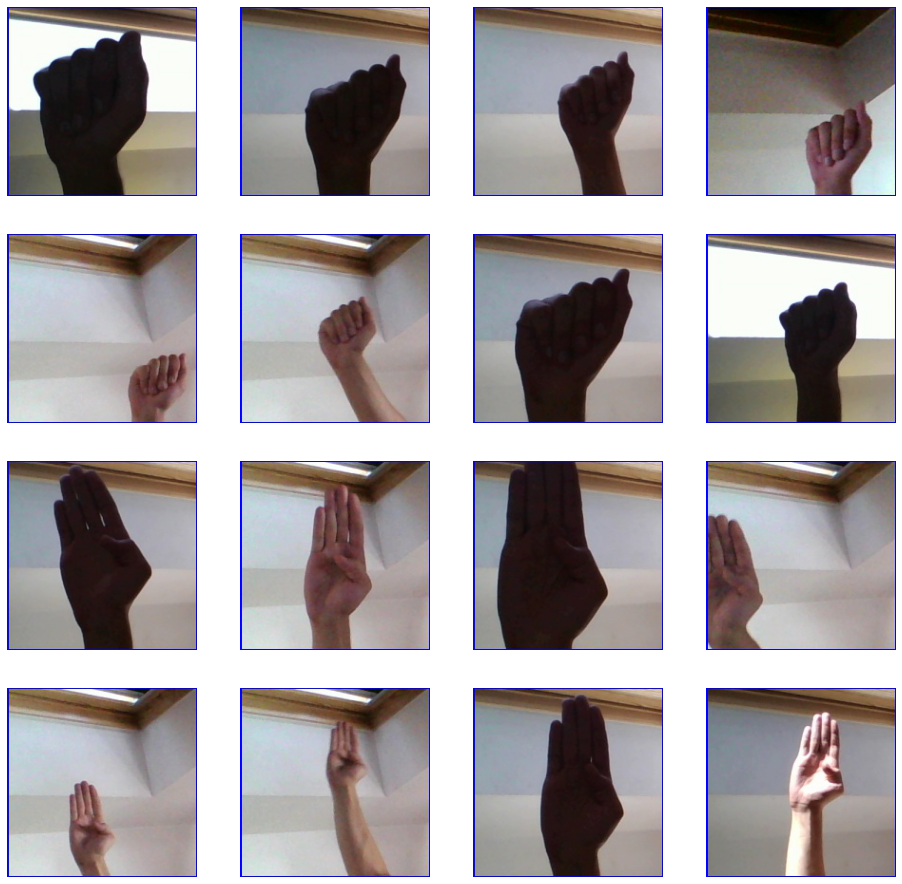

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_a_pix = [os.path.join(train_a_dir, fname) 
                for fname in os.listdir(train_a_dir)[pic_index-8:pic_index]]
next_b_pix = [os.path.join(train_b_dir, fname) 
                for fname in os.listdir(train_b_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_a_pix+next_b_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:

# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (5075, 150, 150, 3)
Train Label =  (5075,)
Validation Data =  (925, 150, 150, 3)
Validation Label =  (925,)


In [ ]:
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [250   2   0]
Data setelah di-normalisasi  [0.98039216 0.00784314 0.        ]


In [ ]:
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               8640128   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
254/254 [==============================] - 14s 50ms/step - loss: 2.8520 - acc: 0.6254 - val_loss: 2.2835 - val_acc: 0.4227
Epoch 2/50
254/254 [==============================] - 12s 49ms/step - loss: 1.4314 - acc: 0.6940 - val_loss: 2.7161 - val_acc: 0.3254
Epoch 3/50
254/254 [==============================] - 12s 49ms/step - loss: 1.3572 - acc: 0.7170 - val_loss: 2.0692 - val_acc: 0.4043
Epoch 4/50
254/254 [==============================] - 12s 49ms/step - loss: 0.8496 - acc: 0.7446 - val_loss: 0.1861 - val_acc: 0.9168
Epoch 5/50
254/254 [==============================] - 12s 48ms/step - loss: 0.5152 - acc: 0.7925 - val_loss: 0.3156 - val_acc: 0.8249
Epoch 6/50
254/254 [==============================] - 12s 49ms/step - loss: 0.4703 - acc: 0.8030 - val_loss: 0.0817 - val_acc: 0.9741
Epoch 7/50
254/254 [==============================] - 12s 49ms/step - loss: 0.4888 - acc: 0.8002 - val_loss: 0.2089 - val_acc: 0.9070
Epoch 8/50
254/254 [==============================] - 12s 49ms

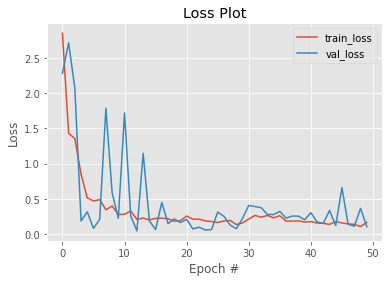

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

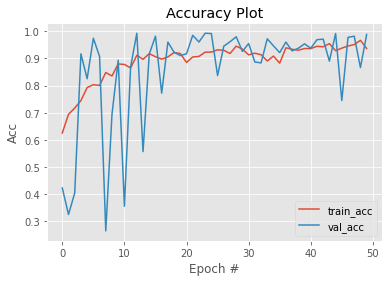

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        25
           1       1.00      0.99      0.99       900

    accuracy                           0.99       925
   macro avg       0.86      0.96      0.90       925
weighted avg       0.99      0.99      0.99       925

